## 123 - Violin Plots of Soil Temperature Data

[Youtube](https://www.youtube.com/watch?v=NJlHbpsq_1Q)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('202212192300.mdf', skiprows = 2, delim_whitespace = True, na_values = -999.000)
df.dropna(inplace = True)
# df.drop(['STID', 'STNM', 'TIME', 'TB10AV1D', 'TB10AV3D', 'TB10AV7D'], inplace = True, axis = 'columns')
df.drop(['STID', 'STNM', 'TIME', 'RELH', 'TAIR', 'WSPD', 'WVEC', 'WDIR', 'WDSD', 'WSSD', 'WMAX', 'RAIN', 'PRES', 'SRAD', 'TA9M', 'WS2M', 'TB10', 'TR05', 'TR25', 'TR60'], inplace = True, axis = 'columns')
df.columns

Index(['TS10', 'TS05', 'TS25', 'TS60'], dtype='object')

In [3]:
# Remove value -998.0
df = df.loc[df['TS25'] != -998.0]
df = df.loc[df['TS60'] != -998.0]

## Variable Name Examples
* TS05
* TS25

In [4]:
def parse_variable_name(var_name):
    """Make a readable name from the mesonet variable name."""
    # var_name = var_name.split('AV')
    # depth = int(var_name[0].replace('TS', ''))
    depth = int(var_name.replace('TS', ''))
    # average = var_name[1].replace('D', '')
    # return f'{depth} cm {average} day Avg.'
    return f'{depth} cm'

In [5]:
# parse_variable_name('TS05AV1D')
parse_variable_name('TS05')

'5 cm'

In [6]:
labels = [parse_variable_name(n) for n in df.columns]
labels

['10 cm', '5 cm', '25 cm', '60 cm']

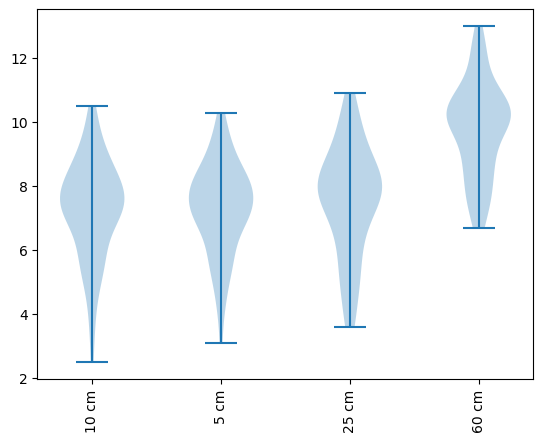

In [7]:
fig, ax = plt.subplots()
_ = ax.violinplot(df.values)
ax.set_xticks(np.arange(1, len(df.columns)+1))
_ = ax.set_xticklabels(labels, rotation = 90)